#Speaker Diarization


In [1]:
## Group = TeNET

## Members - Anirudh Garg (170117), Anubhav Satpathy (170136), Nitish Vikas Deshpande (17807450)

## Load Matlab File into Google Colab

In [ ]:
!pip install PyDrive

In [ ]:
## Add the .mat file in your google drive then run these
## https://buomsoo-kim.github.io/colab/2018/04/16/Importing-files-from-Google-Drive-in-Google-Colab.md/ 
## Refer to the above link for rest of the steps
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt

Mounted at /content/drive


In [ ]:
#downloaded = drive.CreateFolder({'id':"1FND4BXDF7cFWCiT8mV5dIGm519LUcjER"})   # replace the id with id of file you want to access
#downloaded.GetContentFile('MFCC_15_0.1_10_0.mat')

In [ ]:
#!pip install mat4py
import scipy.io as io
#from mat4py import loadmat
#mat = loadmat('sample_file.mat')
path='/content/drive/MyDrive/Speaker_Diarization_Datasets/'
mat = io.loadmat(path + 'MFCC_15_0.1_10_0.mat')

In [ ]:
def check_existing(existing, current):
  for i in existing:
    if i==current: 
      return True
  return False

In [ ]:
def LinUCB(mat):

  rec=mat['data'][0,0]['rec']
  dim=int(mat['data'][0,0]['dim'])
  t=int(mat['data'][0,0]['t'])
  full_y=mat['data'][0,0]['full_y']
  y=mat['data'][0,0]['y']
  useNN=mat['data'][0,0]['useNN']
  nOptions=mat['data'][0,0]['nOptions']
  epiReward=mat['data'][0,0]['epiReward']
  oracle=mat['data'][0,0]['oracle']
  nPiece=mat['data'][0,0]['nPiece']

  ## initialization of variables

  ucb_alpha = 0.1
  A=[]
  b=[]
  
  nArms = 1
  A.append(np.eye(dim))
  b.append(np.zeros([dim,1 ]))
  labls = ['new']
  labln = [0]

  
  y_true = full_y
  x = rec

  reward = 0;
  reward_cumulative = [];
  accuracy_cumulative = [];

  for ts in range(t):


    print("Time step is ", ts)

    labl = y[ts]
    labl_true = y_true[ts]
    feat_vec= np.expand_dims(x[:, ts] , axis=1)    ## Make it a column vector

    stillWrong = 0
    stillCorrect = 0

    p_ts=[]


    for i in range(nArms):
      print(i)
      theta=np.dot(np.linalg.inv(A[i]),b[i])
      p_ts_arm=  np.dot(theta.T,feat_vec)+ucb_alpha*(np.dot(feat_vec.T, np.dot(np.linalg.inv(A[i]),feat_vec)))
      print(p_ts_arm)
      p_ts.append(p_ts_arm)

    pred=np.argmax(p_ts)
    print("Pred is",pred)

    

    if not check_existing(labls, labl ) and (labl != '-1'):
      nArms=nArms+1
      labls.append(labl)
      labln.append(nArms-1)
      A.append(np.eye(dim))
      b.append(np.zeros([dim,1 ]))
      if pred==1:
        stillCorrect=1

    if not stillWrong and (stillCorrect or labls[labln.index(pred)]== labl_true ):
      reward=reward+1
    reward_cumulative.append(reward)
    accuracy=reward/(ts+1)
    print("Accuracy is", accuracy, "\n")
    accuracy_cumulative.append(accuracy)
    
    # set a feedback 

    if (labl != '-1'):
      if labls[labln.index(pred)]== labl:
        feedback_t=1
      else:
        feedback_t=0
      

      # update matrix A and vector b 

      A[pred]=A[pred]+ np.dot(feat_vec, feat_vec.T)
      b[pred]=b[pred]+feedback_t*feat_vec

  return reward_cumulative, accuracy_cumulative, t

In [ ]:
def plotting(reward_cumulative, accuracy_cumulative, t, name):
  plt.figure()
  plt.plot(np.arange(t), reward_cumulative) 
  plt.title('reward vs timestep \n for ' + name)
  plt.xlabel('timestep')
  plt.ylabel('reward')
  plt.show()
  plt.figure()
  plt.plot(np.arange(t), accuracy_cumulative)
  plt.title('accuracy vs timestep \n for ' + name)
  plt.xlabel('timestep')
  plt.ylabel('accuracy')
  plt.show()

In [ ]:
reward_cumulative, accuracy_cumulative, t = LinUCB(mat)

Streaming output truncated to the last 5000 lines.
Time step is  6850
0
[[11.04867958]]
1
[[2.68291663]]
2
[[11.14865378]]
3
[[12.02344993]]
4
[[7.57464223]]
5
[[9.84371568]]
6
[[9.43088573]]
7
[[11.82635958]]
Pred is 3
Accuracy is 0.49423441833309006 

Time step is  6851
0
[[10.21061761]]
1
[[7.34367611]]
2
[[12.86353148]]
3
[[13.75048291]]
4
[[11.40404319]]
5
[[10.52622904]]
6
[[12.75004183]]
7
[[12.3054574]]
Pred is 3
Accuracy is 0.4941622883829539 

Time step is  6852
0
[[12.75981174]]
1
[[11.18173891]]
2
[[15.90283339]]
3
[[15.65960646]]
4
[[16.04344136]]
5
[[12.66416322]]
6
[[18.76329992]]
7
[[16.74780838]]
Pred is 6
Accuracy is 0.4940901794834379 

Time step is  6853
0
[[14.62697982]]
1
[[15.88234846]]
2
[[17.95868868]]
3
[[17.24495184]]
4
[[19.88223245]]
5
[[15.08282711]]
6
[[24.43870494]]
7
[[22.04738076]]
Pred is 6
Accuracy is 0.4940180916253283 

Time step is  6854
0
[[14.70097928]]
1
[[15.74709009]]
2
[[17.1458386]]
3
[[15.76671713]]
4
[[19.71460259]]
5
[[15.15297301]]
6
[[

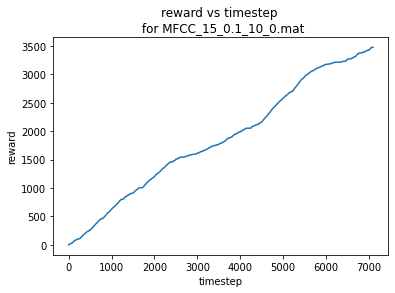

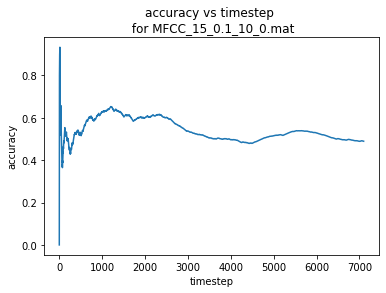

In [ ]:
plotting(reward_cumulative, accuracy_cumulative, t, 'MFCC_15_0.1_10_0.mat')

In [ ]:
mat_2 = io.loadmat(path + 'MFCC_10_0.1_10_0.mat')
reward_cumulative_2, accuracy_cumulative_2, t_2 = LinUCB(mat_2)

Streaming output truncated to the last 5000 lines.
[[14.59655646]]
4
[[20.98229045]]
5
[[22.21269388]]
Pred is 5
Accuracy is 0.6163383152173914 

Time step is  5888
0
[[20.61878109]]
1
[[23.44650603]]
2
[[24.88297699]]
3
[[15.30492863]]
4
[[29.6674668]]
5
[[32.33155215]]
Pred is 5
Accuracy is 0.6164034640855833 

Time step is  5889
0
[[34.34226156]]
1
[[23.08662352]]
2
[[25.61097876]]
3
[[26.883089]]
4
[[28.71561482]]
5
[[45.97159716]]
Pred is 5
Accuracy is 0.6164685908319185 

Time step is  5890
0
[[28.32781408]]
1
[[23.18883932]]
2
[[24.86421513]]
3
[[25.5269839]]
4
[[26.17275924]]
5
[[35.36434309]]
Pred is 5
Accuracy is 0.6165336954676626 

Time step is  5891
0
[[27.75716741]]
1
[[24.10044884]]
2
[[20.2322614]]
3
[[21.5887506]]
4
[[21.39530099]]
5
[[35.21661066]]
Pred is 5
Accuracy is 0.6165987780040734 

Time step is  5892
0
[[23.51736987]]
1
[[20.01690459]]
2
[[20.63490403]]
3
[[22.91422635]]
4
[[22.43807553]]
5
[[34.5694211]]
Pred is 5
Accuracy is 0.6166638384524011 

Time step i

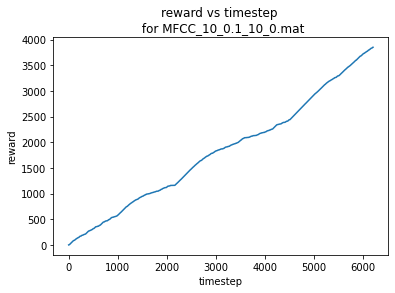

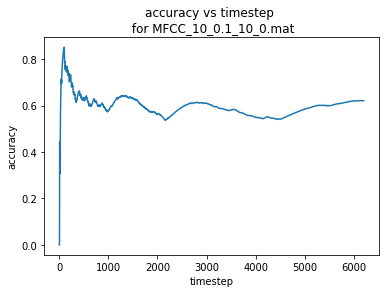

In [ ]:
plotting(reward_cumulative_2, accuracy_cumulative_2, t_2, 'MFCC_10_0.1_10_0.mat')

In [ ]:
mat_3 = io.loadmat(path + 'MFCC_5_0.1_10_0.mat')
reward_cumulative_3, accuracy_cumulative_3, t_3 = LinUCB(mat_3)

Streaming output truncated to the last 5000 lines.
Accuracy is 0.5047338196492317 

Time step is  6443
0
[[0.23410084]]
1
[[0.35797858]]
2
[[0.94255867]]
3
[[0.46954264]]
4
[[0.57602408]]
Pred is 2
Accuracy is 0.5048106765983861 

Time step is  6444
0
[[0.187845]]
1
[[0.58478288]]
2
[[1.02659361]]
3
[[0.42964915]]
4
[[0.5004675]]
Pred is 2
Accuracy is 0.5048875096974399 

Time step is  6445
0
[[0.22999859]]
1
[[0.48925598]]
2
[[0.85600239]]
3
[[0.47057513]]
4
[[0.63898007]]
Pred is 2
Accuracy is 0.504964318957493 

Time step is  6446
0
[[0.28389741]]
1
[[-0.0385881]]
2
[[0.70305805]]
3
[[0.3626128]]
4
[[0.46270486]]
Pred is 2
Accuracy is 0.5050411043896386 

Time step is  6447
0
[[0.28013907]]
1
[[0.13032778]]
2
[[1.1753162]]
3
[[0.74272013]]
4
[[0.66802993]]
Pred is 2
Accuracy is 0.5051178660049628 

Time step is  6448
0
[[0.33203716]]
1
[[0.20205241]]
2
[[0.9192377]]
3
[[0.68312089]]
4
[[0.61300654]]
Pred is 2
Accuracy is 0.5051946038145448 

Time step is  6449
0
[[0.46933264]]
1
[[0

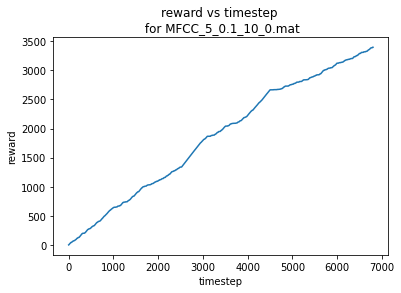

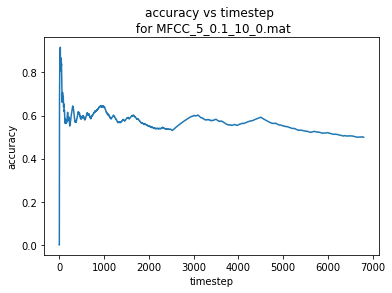

In [ ]:
plotting(reward_cumulative_3, accuracy_cumulative_3, t_3, 'MFCC_5_0.1_10_0.mat')

In [ ]:
mat_4 = io.loadmat(path + 'MFCC_5_0.01_10_0.mat')
reward_cumulative_4, accuracy_cumulative_4, t_4 = LinUCB(mat_4)

Streaming output truncated to the last 5000 lines.
Accuracy is 0.4311656060841223 

Time step is  6443
0
[[0.60065939]]
1
[[0.46346817]]
2
[[1.16314316]]
3
[[0.67536576]]
4
[[1.00917838]]
Pred is 2
Accuracy is 0.4312538795779019 

Time step is  6444
0
[[0.6632829]]
1
[[0.40492361]]
2
[[1.04687104]]
3
[[0.70440784]]
4
[[0.99710259]]
Pred is 2
Accuracy is 0.4313421256788208 

Time step is  6445
0
[[0.79288579]]
1
[[0.62539997]]
2
[[1.34835557]]
3
[[0.97133284]]
4
[[1.19328181]]
Pred is 2
Accuracy is 0.4314303443996277 

Time step is  6446
0
[[0.84789658]]
1
[[0.70902337]]
2
[[1.36981396]]
3
[[1.09681217]]
4
[[1.32061971]]
Pred is 2
Accuracy is 0.4315185357530634 

Time step is  6447
0
[[0.84780734]]
1
[[0.46081303]]
2
[[1.22685675]]
3
[[0.86874748]]
4
[[1.18521359]]
Pred is 2
Accuracy is 0.43160669975186106 

Time step is  6448
0
[[1.01942394]]
1
[[0.69379284]]
2
[[1.68340557]]
3
[[1.12585276]]
4
[[1.27841959]]
Pred is 2
Accuracy is 0.43169483640874556 

Time step is  6449
0
[[1.23309816

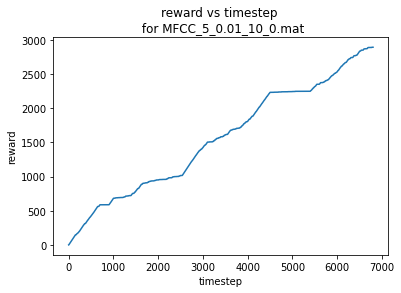

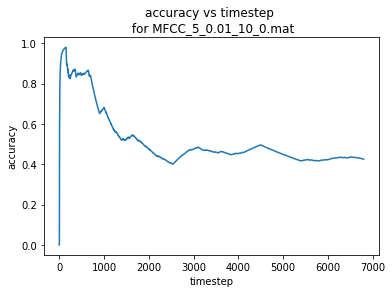

In [ ]:
plotting(reward_cumulative_4, accuracy_cumulative_4, t_4, 'MFCC_5_0.01_10_0.mat')

In [ ]:
mat_5 = io.loadmat(path + 'MFCC_10_0.01_10_0.mat')
reward_cumulative_5, accuracy_cumulative_5, t_5 = LinUCB(mat_5)

Streaming output truncated to the last 5000 lines.
[[40.47707585]]
4
[[33.28248859]]
5
[[67.77450188]]
Pred is 5
Accuracy is 0.5018682065217391 

Time step is  5888
0
[[62.00671227]]
1
[[48.90282676]]
2
[[48.07927735]]
3
[[55.43290202]]
4
[[56.55074676]]
5
[[87.30788181]]
Pred is 5
Accuracy is 0.5019527933435218 

Time step is  5889
0
[[84.81324063]]
1
[[65.31535979]]
2
[[68.08986046]]
3
[[82.47338139]]
4
[[73.76789006]]
5
[[127.07560411]]
Pred is 5
Accuracy is 0.5020373514431239 

Time step is  5890
0
[[61.8241313]]
1
[[55.44746347]]
2
[[64.20305548]]
3
[[68.1055894]]
4
[[61.71962221]]
5
[[92.45300395]]
Pred is 5
Accuracy is 0.5021218808351723 

Time step is  5891
0
[[62.71835203]]
1
[[46.57601625]]
2
[[52.3413516]]
3
[[60.41899768]]
4
[[50.54855748]]
5
[[84.90780702]]
Pred is 5
Accuracy is 0.5022063815342838 

Time step is  5892
0
[[55.66156647]]
1
[[42.94259689]]
2
[[55.23295238]]
3
[[54.09470272]]
4
[[51.97704285]]
5
[[85.40333121]]
Pred is 5
Accuracy is 0.5022908535550653 

Time s

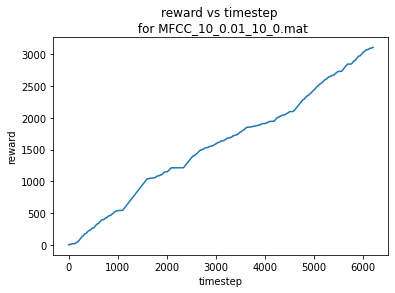

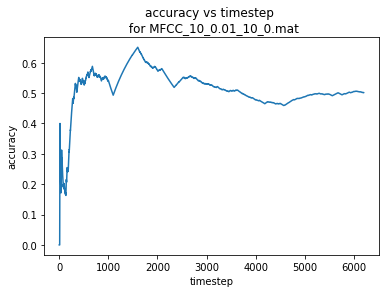

In [ ]:
plotting(reward_cumulative_5, accuracy_cumulative_5, t_5, 'MFCC_10_0.01_10_0.mat')

In [ ]:
mat_6 = io.loadmat(path + 'MFCC_15_0.01_10_0.mat')
reward_cumulative_6, accuracy_cumulative_6, t_6 = LinUCB(mat_6)

Streaming output truncated to the last 5000 lines.
Time step is  6850
0
[[30.1416302]]
1
[[28.43077673]]
2
[[35.04403838]]
3
[[28.57126772]]
4
[[34.73479824]]
5
[[33.57856727]]
6
[[33.21427046]]
7
[[34.50445376]]
Pred is 2
Accuracy is 0.38373960005838564 

Time step is  6851
0
[[34.58997322]]
1
[[33.62442265]]
2
[[42.7918542]]
3
[[34.98020606]]
4
[[40.84916462]]
5
[[37.01015842]]
6
[[38.50703288]]
7
[[39.95796411]]
Pred is 2
Accuracy is 0.3836835960303561 

Time step is  6852
0
[[46.91129667]]
1
[[42.3999379]]
2
[[54.66518144]]
3
[[47.68211235]]
4
[[52.43401432]]
5
[[46.62010402]]
6
[[48.75958866]]
7
[[50.74602421]]
Pred is 2
Accuracy is 0.38362760834670945 

Time step is  6853
0
[[58.91782795]]
1
[[51.71441865]]
2
[[67.18679703]]
3
[[59.44764417]]
4
[[62.70465065]]
5
[[55.28227041]]
6
[[58.47931833]]
7
[[61.30319127]]
Pred is 2
Accuracy is 0.3835716370002918 

Time step is  6854
0
[[56.9702974]]
1
[[54.75192094]]
2
[[66.23767548]]
3
[[55.18213745]]
4
[[62.73082062]]
5
[[54.25381015]]


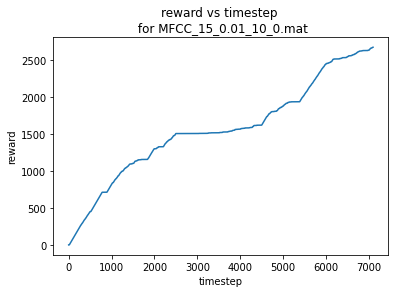

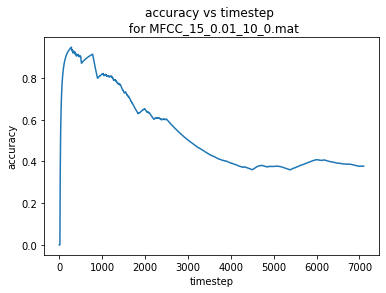

In [ ]:
plotting(reward_cumulative_6, accuracy_cumulative_6, t_6, 'MFCC_15_0.01_10_0.mat')

In [ ]:
mat_7 = io.loadmat(path + 'MFCC_5_0.5_10_0.mat')
reward_cumulative_7, accuracy_cumulative_7, t_7 = LinUCB(mat_7)

Streaming output truncated to the last 5000 lines.
Accuracy is 0.5446220704640695 

Time step is  6443
0
[[0.01053726]]
1
[[0.37345863]]
2
[[0.64775927]]
3
[[0.33443531]]
4
[[0.20716633]]
Pred is 2
Accuracy is 0.5446927374301676 

Time step is  6444
0
[[0.00782032]]
1
[[0.50393196]]
2
[[0.93843083]]
3
[[0.5424926]]
4
[[0.62701807]]
Pred is 2
Accuracy is 0.5447633824670287 

Time step is  6445
0
[[0.00785427]]
1
[[0.55698335]]
2
[[0.91825548]]
3
[[0.64021124]]
4
[[0.45998186]]
Pred is 2
Accuracy is 0.5448340055848588 

Time step is  6446
0
[[0.01041469]]
1
[[0.46422661]]
2
[[1.06531072]]
3
[[0.58490274]]
4
[[0.63480261]]
Pred is 2
Accuracy is 0.5449046067938577 

Time step is  6447
0
[[0.01320428]]
1
[[0.17432221]]
2
[[0.8132138]]
3
[[0.72057118]]
4
[[0.81748434]]
Pred is 4
Accuracy is 0.5448200992555832 

Time step is  6448
0
[[0.01416778]]
1
[[0.37525599]]
2
[[0.66564512]]
3
[[0.48500554]]
4
[[0.49138423]]
Pred is 2
Accuracy is 0.5448906807256939 

Time step is  6449
0
[[0.03083936]]


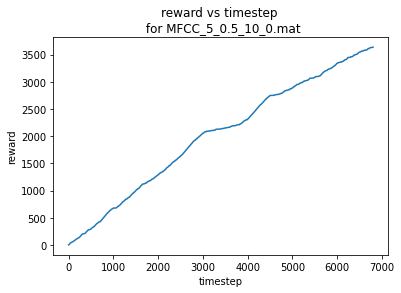

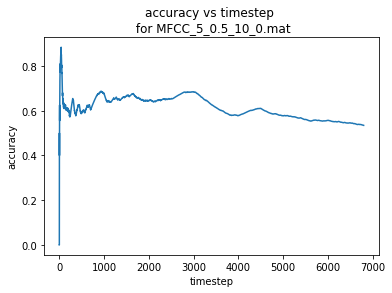

In [ ]:
plotting(reward_cumulative_7, accuracy_cumulative_7, t_7, 'MFCC_5_0.5_10_0.mat')

In [ ]:
mat_8 = io.loadmat(path + 'MFCC_10_0.5_10_0.mat')
reward_cumulative_8, accuracy_cumulative_8, t_8 = LinUCB(mat_8)

Streaming output truncated to the last 5000 lines.
[[0.20835319]]
4
[[-2.02333149]]
5
[[1.66175033]]
Pred is 5
Accuracy is 0.6416440217391305 

Time step is  5888
0
[[0.74272017]]
1
[[-0.26930586]]
2
[[-1.22477972]]
3
[[-4.85625158]]
4
[[-2.23724542]]
5
[[13.10634627]]
Pred is 5
Accuracy is 0.6417048734929529 

Time step is  5889
0
[[0.68316826]]
1
[[-1.48414195]]
2
[[-0.01245662]]
3
[[-3.48997764]]
4
[[-2.01247672]]
5
[[17.62606178]]
Pred is 5
Accuracy is 0.6417657045840407 

Time step is  5890
0
[[0.73148156]]
1
[[-3.99052997]]
2
[[-2.22702259]]
3
[[-1.8243671]]
4
[[4.31129221]]
5
[[15.32916437]]
Pred is 5
Accuracy is 0.6418265150229163 

Time step is  5891
0
[[0.94019019]]
1
[[-1.82532929]]
2
[[-2.90318389]]
3
[[-0.30551365]]
4
[[-4.06702632]]
5
[[9.75029205]]
Pred is 5
Accuracy is 0.641887304820095 

Time step is  5892
0
[[0.72948861]]
1
[[-3.57312786]]
2
[[1.86808058]]
3
[[-3.50691272]]
4
[[3.62963699]]
5
[[6.34039719]]
Pred is 5
Accuracy is 0.6419480739860852 

Time step is  5893

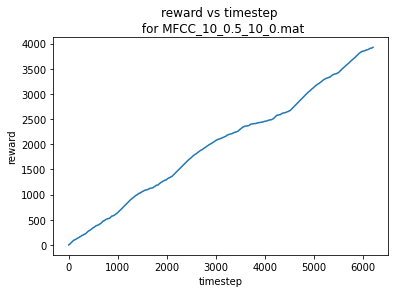

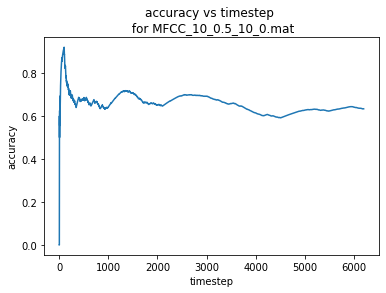

In [ ]:
plotting(reward_cumulative_8, accuracy_cumulative_8, t_8, 'MFCC_10_0.5_10_0.mat')

In [ ]:
mat_9 = io.loadmat(path + 'MFCC_15_0.5_10_0.mat')
reward_cumulative_9, accuracy_cumulative_9, t_9 = LinUCB(mat_9)

Streaming output truncated to the last 5000 lines.
Time step is  6850
0
[[0.60877453]]
1
[[1.64657476]]
2
[[-0.96215731]]
3
[[1.96562974]]
4
[[1.23500829]]
5
[[-0.51210346]]
6
[[0.79341046]]
7
[[0.78140347]]
Pred is 3
Accuracy is 0.5286819442417166 

Time step is  6851
0
[[0.73540647]]
1
[[1.81180941]]
2
[[-0.9045454]]
3
[[1.65678367]]
4
[[-0.4450006]]
5
[[-0.44575919]]
6
[[-0.97060854]]
7
[[-0.75031604]]
Pred is 1
Accuracy is 0.528604786923526 

Time step is  6852
0
[[0.79664694]]
1
[[0.583684]]
2
[[-0.76065365]]
3
[[1.85636642]]
4
[[-0.07628043]]
5
[[-0.17221343]]
6
[[1.12884178]]
7
[[-0.57893454]]
Pred is 3
Accuracy is 0.5285276521231578 

Time step is  6853
0
[[0.99339333]]
1
[[1.43760052]]
2
[[-0.64224904]]
3
[[0.83869901]]
4
[[-0.24196472]]
5
[[-0.26445937]]
6
[[1.11282266]]
7
[[-0.52243806]]
Pred is 1
Accuracy is 0.5284505398307557 

Time step is  6854
0
[[0.89793362]]
1
[[0.47776952]]
2
[[-0.1281096]]
3
[[0.56867844]]
4
[[-0.58533536]]
5
[[-0.2497149]]
6
[[1.10328759]]
7
[[0.62

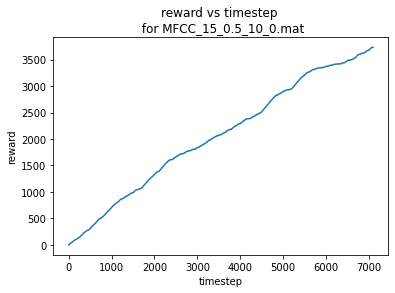

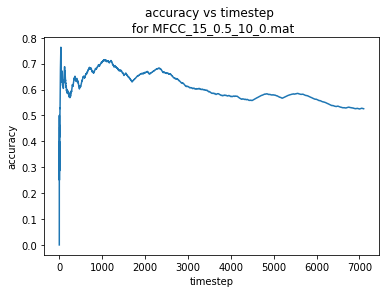

In [ ]:
plotting(reward_cumulative_9, accuracy_cumulative_9, t_9, 'MFCC_15_0.5_10_0.mat')